In [1]:
%matplotlib inline

In [2]:
import os
import sys
import math
import torch
import torchvision
import numpy as np
from tqdm import tqdm
from PIL import Image

In [3]:
sys.path.insert(1, 'model')

In [4]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
from collections import OrderedDict
from read_image import read_image, tensor_to_image
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt
from deep_invert import DeepInvert

In [76]:
cnn = models.alexnet(pretrained=True)
cnn.eval()
mycnn = DeepInvert(cnn, '20')

In [77]:
for name, param in mycnn.named_parameters():
    if param.requires_grad:
        param.requires_grad = False
        print(name)

cnn.features.0.weight
cnn.features.0.bias
cnn.features.3.weight
cnn.features.3.bias
cnn.features.6.weight
cnn.features.6.bias
cnn.features.8.weight
cnn.features.8.bias
cnn.features.10.weight
cnn.features.10.bias
cnn.classifier.1.weight
cnn.classifier.1.bias
cnn.classifier.4.weight
cnn.classifier.4.bias
cnn.classifier.6.weight
cnn.classifier.6.bias


In [78]:
image = read_image('./test/gp.jpg')

In [79]:
target = mycnn(image)

In [80]:
target = target.detach()

In [81]:
x = torch.rand_like(image,requires_grad= True)

In [82]:
loss = nn.MSELoss(reduction='sum')

In [101]:
optimizer = optim.Adam([x], lr=0.1)

In [108]:
for i in range(100):
    optimizer.zero_grad()
    out = mycnn(x)
    mse = loss(out, target) / torch.norm(target) + 0.00001*torch.sum(x**6)
    if i % 10 == 0:
        print(i, mse)
    mse.backward()
    optimizer.step()

0 tensor(16.1357, grad_fn=<AddBackward0>)
10 tensor(15.9227, grad_fn=<AddBackward0>)
20 tensor(15.8629, grad_fn=<AddBackward0>)
30 tensor(15.7123, grad_fn=<AddBackward0>)
40 tensor(15.6355, grad_fn=<AddBackward0>)
50 tensor(15.4778, grad_fn=<AddBackward0>)
60 tensor(15.4324, grad_fn=<AddBackward0>)
70 tensor(15.3285, grad_fn=<AddBackward0>)
80 tensor(15.4522, grad_fn=<AddBackward0>)
90 tensor(15.3613, grad_fn=<AddBackward0>)


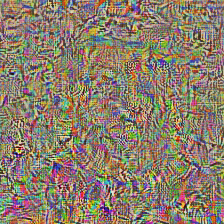

In [109]:
tensor_to_image(x)

In [20]:
x.min()

tensor(-0.1275, grad_fn=<MinBackward1>)

In [ ]:
tensor_to_image??

In [ ]:
x

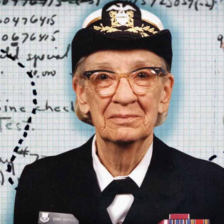

In [75]:
tensor_to_image(image)

In [23]:
target.shape

torch.Size([1, 192, 27, 27])

In [ ]:
out

In [ ]:
target